In [1]:
import numpy as np
import pylab
import math
import matplotlib.pyplot as plt
import scipy.stats as sps
%matplotlib inline

<h2>Распределение, у которого конечны первые четыре момента, а пятое - нет</h2>

$\begin{equation*} 
p(x) = 
 \begin{cases}
  |x^{-6}| &|x|>1\\
  0.1 &|x|\leq1
 \end{cases}
\end{equation*}$ <br>
При $a\geq5$, интеграл $\int_{-\infty}^{+\infty}|x^a|\cdot p(x) dx$ расходится.<br>
При $a<5$ сходится.

In [36]:
# Определяем заданое распределение.
class my_gen(sps.rv_continuous):
    def _pdf(self, x:int):
            if (abs(x) > 1):
                return abs(x) ** -6
            else:
                return 0.3
            
myGen = my_gen(name='myGen')

/usr/local/lib/python3.4/dist-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


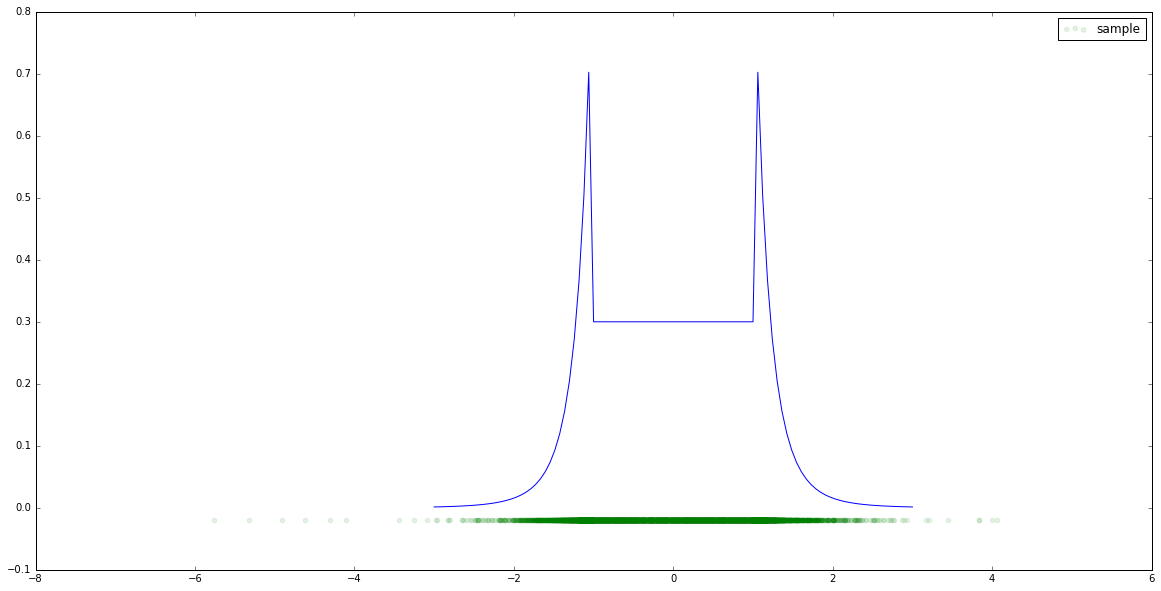

In [37]:
plt.figure(figsize=(20, 10))
# Строим график плотности нашего распределения.
x = np.linspace(-3, 3, 100)
y = [myGen.pdf(t) for t in x]
plt.plot(x, y)

# Генерируем выборку.
maxSize = 10000
sample = myGen.rvs(size=maxSize)
plt.scatter(sample, np.zeros(maxSize) - 0.02, alpha=0.1, color="green", label="sample")
plt.legend()
plt.show()

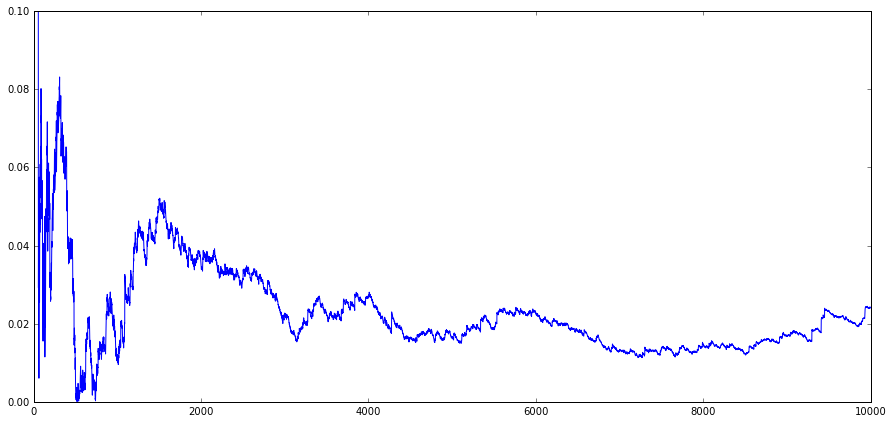

In [40]:
# Считаем оценку дисперсии для всех n < N
estimation = []
variance = 0.856783856044#myGen.var()

for sampleSize in range(1, maxSize, 1):
        estimation.append(abs(np.var(sample[:sampleSize]) - variance))
        
plt.figure(figsize=(15, 7))
plt.plot(estimation)
plt.ylim(0, 0.1)
plt.show()

<h2>Оценка дисперсии распределения Коши</h2>

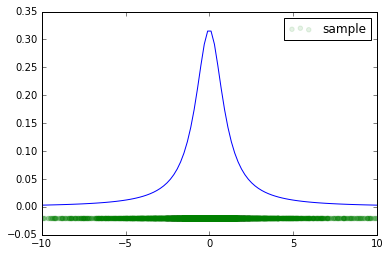

In [45]:
from scipy.stats import cauchy
# Строим график плотности распределения Коши.
x = np.linspace(-10, 10, 100)
y = [cauchy.pdf(t) for t in x]
plt.plot(x, y)

# Генерируем выборку.
maxSize = 10000
sample = cauchy.rvs(size=maxSize)
plt.scatter(sample, np.zeros(maxSize) - 0.02, alpha=0.1, color="green", label="sample")
plt.legend()
plt.xlim(-10, 10)
plt.show()

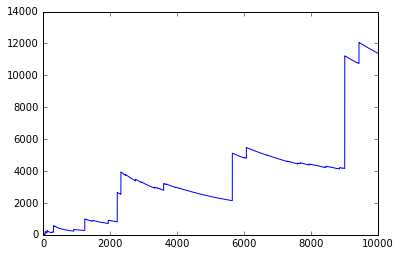

In [46]:
# Строим график оценки дисперсии распределения Коши.
estimation = []
for sampleSize in range(1, maxSize):
    estimation.append(np.var(sample[:sampleSize]))

plt.plot(estimation)
plt.show()